# Masks and Medical Resources Distribution for COVID-19 Treatment in West Java, Indonesia #

### Applied Data Science Capstone by Coursera ###

## Table of Contents
1. Introduction: Business Problem
2. Data
3. Methodology
4. Analysis
5. Results and Discussion
6. Conclusion

## Introduction: Business Problem ##

In March 2020, the first suspect of Covid-19 appeared in Depok, a city in West Java, Indonesia. The number of new suspects was growing ever since then in the nearest areas like DKI Jakarta, Banten, and other provinces across Indonesia. Many stakeholders play their part in this pandemic, including central to local government, medical personnel, and even data scientists. In this case, data scientists help assessed the situations in places on specific areas about availability, quantity, and distribution mapping of health infrastructures like the testing centers and authorized hospitals for patients treatment. In this project, I would like to conduct a simple analysis to determine strategic locations for masks and medical resources for COVID-19 treatment in West Java, based on confirmed cases on 6 December 2020, as well as the red zone areas for “new normal” condition.

## Data ##

There are several factors that would be the consideration in determining the masks and medical resources: 
- Covid-19 cases on each district/city “https://pikobar.jabarprov.go.id/distribution-case” 
- Total population of West Java in 2020 https://tumoutounews.com/2019/12/06/jumlah-penduduk-jawa-barat-tahun-2020/#Persebaran_dan_Kepadatan_Penduduk_Jawa_Barat 
- Distribution and Population Density of West Java https://tumoutounews.com/2019/12/06/jumlah-penduduk-jawa-barat-tahun-2020/#Persebaran_dan_Kepadatan_Penduduk_Jawa_Barat 
- Hospital for Covid-19 treatment https://pikobar.jabarprov.go.id/contact 

The following data sources are also needed to extract/generate the required information:
- Processed Covid-19 positive case data collection in West Java as of 6 December 2020. 
- The distribution of mask sales based on the population in the West Java.
- The distribution of mask sales based on population density. 
- New datasets from hospital data that contains city or residence, along with their latitudes and longitudes.

First, import the necessary libraries

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
!pip install bs4
from bs4 import BeautifulSoup # library for web scrapping

!conda install -c conda-forge geocoder --yes
print ("install geocoder")
!conda install -c conda-forge/label/gcc7 geocoder --yes
print ("install geocoder2")
!conda install -c conda-forge/label/cf201901 geocoder --yes
print ("install geocoder3")
!conda install -c conda-forge/label/cf202003 geocoder --yes
print ("install geocoder4")
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 122kB 7.8MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py36he6145b8_1001         347 KB  conda-forge
    chardet-3.0.4              |py36h9880bd3_1008         194 KB  conda-forge
    click-7.1.2                |     pyh9f0ad1d_0          64 KB  conda-forge
    cryptography-3.2.1         |   py36h6ec43e4_0         633 KB  conda-forge
    future-0.18.2              |   py36h5fab9bb_2         713 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    pysocks-1.7.1              |

After Folium installed and Libraries are imported, add a Foursquare developer account and have the credentials ready.

In [2]:
CLIENT_ID = 'K3C2ZJ3MRUF2MATZHEPADNELXTNLARSCRRKGKGHIUQN2KU3T' # your Foursquare ID
CLIENT_SECRET = 'K4AELPMAMXQO2IFJAS4IZVWABCEPDGP1S11OV4VDQCUXOYCA' # your Foursquare Secret
ACCESS_TOKEN = 'JWLAKH4WWASNXE4ZQOIVXTW1KIMB4XSD4AL00KMP40IZZHN1' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: K3C2ZJ3MRUF2MATZHEPADNELXTNLARSCRRKGKGHIUQN2KU3T
CLIENT_SECRET:K4AELPMAMXQO2IFJAS4IZVWABCEPDGP1S11OV4VDQCUXOYCA


### Read and show all data used.

Read and show data Covid-19 cases per City/Regency.

In [3]:
# Read in the data Covid-19 cases per district (28 May,2020)
df_cases = pd.read_csv("https://raw.githubusercontent.com/ciptarianto/Coursera_Capstone/main/Covid-19%20West%20Java%20(6%20December%202020).csv")

# View the top rows of the dataset
df_cases

,Nama Kota/Kabupaten,Terkonfirmasi,Isolasi/Dalam Perawatan,Selesai Isolasi/Sembuh,Meninggal,Suspek,Kontak Erat,Masih Karantina
0,KOTA/KAB BELUM TERIDENTIFIKASI,2388,0,2386,2,0,64492,12581
1,KAB. BOGOR,3936,2,3918,16,6150,0,0
2,KAB. SUKABUMI,1416,194,1204,18,5468,473,0
3,KAB. CIANJUR,200,38,160,2,1679,0,0
4,KAB. BANDUNG,2384,599,1764,21,2450,274,0
5,KAB. GARUT,1613,615,970,28,2450,5604,496
6,KAB. TASIKMALAYA,323,0,321,2,1757,380,93
7,KAB. CIAMIS,374,119,246,9,2142,5115,481
8,KAB. KUNINGAN,1051,174,862,15,2570,691,224
9,KAB. CIREBON,1439,215,1152,72,358,442,187


Read and show the top 5 data rows from Covid-19 cases per City/Regency.

In [4]:
df_cases.head()

,Nama Kota/Kabupaten,Terkonfirmasi,Isolasi/Dalam Perawatan,Selesai Isolasi/Sembuh,Meninggal,Suspek,Kontak Erat,Masih Karantina
0,KOTA/KAB BELUM TERIDENTIFIKASI,2388,0,2386,2,0,64492,12581
1,KAB. BOGOR,3936,2,3918,16,6150,0,0
2,KAB. SUKABUMI,1416,194,1204,18,5468,473,0
3,KAB. CIANJUR,200,38,160,2,1679,0,0
4,KAB. BANDUNG,2384,599,1764,21,2450,274,0


Read and show the bottom 5 data rows from Covid-19 cases per City/Regency.

In [5]:
df_cases.tail()

,Nama Kota/Kabupaten,Terkonfirmasi,Isolasi/Dalam Perawatan,Selesai Isolasi/Sembuh,Meninggal,Suspek,Kontak Erat,Masih Karantina
23,KOTA BEKASI,10677,1401,9130,146,10034,3123,0
24,KOTA DEPOK,8461,1730,6526,205,10617,2584,272
25,KOTA CIMAHI,1837,630,1199,8,1776,1057,442
26,KOTA TASIKMALAYA,1002,407,580,15,1484,0,0
27,KOTA BANJAR,208,100,107,1,683,380,55


Read and show the total population data in West Java 2020.

In [6]:
# Read in the data total population in West Java 2020
df_population = pd.read_csv("https://raw.githubusercontent.com/ciptarianto/Coursera_Capstone/main/Populasi-Jawa-Barat.csv")
# View the top rows of the dataset
df_population

,Kabupaten/Kota,Jumlah
0,KAB. BOGOR,5840907
1,KAB. SUKABUMI,2460693
2,KAB. CIANJUR,2260620
3,KAB. BANDUNG,3717291
4,KAB. GARUT,2606399
5,KAB. TASIKMALAYA,1751295
6,KAB. CIAMIS,1188629
7,KAB. KUNINGAN,1074497
8,KAB. CIREBON,2176213
9,KAB. MAJALENGKA,1199300


In [7]:
df_population.info()

# Get the total number of population of West Java in 2020
print ("Total Polulation :", df_population['Jumlah'].sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Kabupaten/Kota  27 non-null     object
 1   Jumlah          27 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 560.0+ bytes
Total Polulation : 48683861


Read and show the top 5 data rows of population density in each City/Regency.

In [8]:
df_population.head()

,Kabupaten/Kota,Jumlah
0,KAB. BOGOR,5840907
1,KAB. SUKABUMI,2460693
2,KAB. CIANJUR,2260620
3,KAB. BANDUNG,3717291
4,KAB. GARUT,2606399


Rank the data from least to most populated.

In [9]:
# making data frame from csv file 
df_most_population = pd.read_csv("https://raw.githubusercontent.com/ciptarianto/Coursera_Capstone/main/Populasi-Jawa-Barat.csv") 
  
# sorting w.r.t name column 
df_most_population.sort_values("Jumlah", inplace = True) 
df_most_population["Rank"] = df_most_population["Jumlah"].rank(method ='min') 
  
# display after sorting w.r.t Name column 
df_most_population

,Kabupaten/Kota,Jumlah,Rank
26,KOTA BANJAR,182819,1.0
21,KOTA CIREBON,316277,2.0
19,KOTA SUKABUMI,326282,3.0
17,KAB. PANGANDARAN,397187,4.0
24,KOTA CIMAHI,607811,5.0
25,KOTA TASIKMALAYA,662723,6.0
13,KAB. PURWAKARTA,953414,7.0
7,KAB. KUNINGAN,1074497,8.0
18,KOTA BOGOR,1096828,9.0
10,KAB. SUMEDANG,1149906,10.0


Read and show top 5 most populated City/District in West Java.

In [10]:
df_most_population.tail()

,Kabupaten/Kota,Jumlah,Rank
4,KAB. GARUT,2606399,23.0
22,KOTA BEKASI,2931897,24.0
15,KAB. BEKASI,3630907,25.0
3,KAB. BANDUNG,3717291,26.0
0,KAB. BOGOR,5840907,27.0


Now let's take a look the hospital data that provide treatment for Covid-19 patient in West Java. Construct a Pandas data frame for subsequent data analysis.

In [11]:
# Read in the data Hospital for treatment covid-19
df_hospital = pd.read_csv("https://raw.githubusercontent.com/ciptarianto/Coursera_Capstone/main/RS_Rujukan_Covid-19.csv")

# View the top rows of the dataset
df_hospital

,Hospital,City/Regency
0,RSU Dr. Hasan Sadikin,Kota Bandung
1,RSTP Dr. H. A. Rotinsulu,Kota Bandung
2,RSAU Dr. M. Salamun Bandung,Kota Bandung
3,RS Immanuel Bandung,Kota Bandung
4,RS Santo Borromeus Bandung,Kota Bandung
...,...,...
100,RS Mitra Keluarga Cibubur,Kota Bekasi
101,RS Siloam Bekasi Sepanjang Jaya,Kota Bekasi
102,RS Satria Medika,Kota Bekasi
103,RS Mitra Keluarga Pratama Jatiasih,Kota Bekasi


Read and show the top 5 data rows from Hospital data providing treatment for Covid-19 patient.

In [12]:
df_hospital.head()

,Hospital,City/Regency
0,RSU Dr. Hasan Sadikin,Kota Bandung
1,RSTP Dr. H. A. Rotinsulu,Kota Bandung
2,RSAU Dr. M. Salamun Bandung,Kota Bandung
3,RS Immanuel Bandung,Kota Bandung
4,RS Santo Borromeus Bandung,Kota Bandung


This part sums up the data mining and data exploration section. Next, in the METHODOLOGY section, will be described the process of how to conduct a ‘Visual’ approach to better understand all the data using data science and data analytics tool kits.

# Methodology #

First, create a new dataset of only ACTIVE CASES and QUARANTINE from the Covid-19 Case table on 6 December 2020. For further analysis, we only use ACTIVE CASES as an in

In [13]:
df_cases.columns

Index(['Nama Kota/Kabupaten', 'Terkonfirmasi', 'Isolasi/Dalam Perawatan',
       'Selesai Isolasi/Sembuh', 'Meninggal', 'Suspek', 'Kontak Erat',
       'Masih Karantina'],
      dtype='object')

Remove / drop irrelevant columns for this analysis.

In [14]:
df_cases.drop(columns =["Terkonfirmasi","Selesai Isolasi/Sembuh", "Meninggal", "Suspek", "Kontak Erat"], inplace=True)
df_cases.head()

,Nama Kota/Kabupaten,Isolasi/Dalam Perawatan,Masih Karantina
0,KOTA/KAB BELUM TERIDENTIFIKASI,0,12581
1,KAB. BOGOR,2,0
2,KAB. SUKABUMI,194,0
3,KAB. CIANJUR,38,0
4,KAB. BANDUNG,599,0


In [15]:
df_cases.tail()

,Nama Kota/Kabupaten,Isolasi/Dalam Perawatan,Masih Karantina
23,KOTA BEKASI,1401,0
24,KOTA DEPOK,1730,272
25,KOTA CIMAHI,630,442
26,KOTA TASIKMALAYA,407,0
27,KOTA BANJAR,100,55


In [16]:
indexNames = df_cases[(df_cases['Nama Kota/Kabupaten'] == 'KOTA/KAB BELUM TERIDENTIFIKASI')].index
df_cases.drop(indexNames, inplace=True)
df_cases.head()

,Nama Kota/Kabupaten,Isolasi/Dalam Perawatan,Masih Karantina
1,KAB. BOGOR,2,0
2,KAB. SUKABUMI,194,0
3,KAB. CIANJUR,38,0
4,KAB. BANDUNG,599,0
5,KAB. GARUT,615,496


In [17]:
# Rename columns name to English
df_cases = df_cases.rename(columns = {'Nama Kota/Kabupaten':'CITY/REGENCY', 'Isolasi/Dalam Perawatan':'ACTIVE CASES', 'Masih Karantina':'QUARANTINE'})
df_cases

,CITY/REGENCY,ACTIVE CASES,QUARANTINE
1,KAB. BOGOR,2,0
2,KAB. SUKABUMI,194,0
3,KAB. CIANJUR,38,0
4,KAB. BANDUNG,599,0
5,KAB. GARUT,615,496
6,KAB. TASIKMALAYA,0,93
7,KAB. CIAMIS,119,481
8,KAB. KUNINGAN,174,224
9,KAB. CIREBON,215,187
10,KAB. MAJALENGKA,367,593


In [18]:
# Get the number and the names of each municipality or city in West Java
df_cases['CITY/REGENCY'].unique()
print(df_cases['CITY/REGENCY'].unique())
np.array(['KAB. BOGOR', 'KAB. SUKABUMI', 'KAB. CIANJUR','KAB. BANDUNG', 'KAB. GARUT', 'KAB. TASIKMALAYA', 'KAB. CIAMIS', 'KAB. KUNINGAN', 'KAB. CIREBON', 'KAB. MAJALENGKA', 'KAB. SUMEDANG', 'KAB. INDRAMAYU', 'KAB. SUBANG', 'KAB. PURWAKARTA', 'KAB. KARAWANG', 'KAB. BEKASI', 'KAB. BANDUNG BARAT', 'KAB. PANGANDARAN'
 'KOTA BOGOR', 'KOTA SUKABUMI', 'KOTA BANDUNG', 'KOTA CIREBON', 'KOTA BEKASI', 'KOTA DEPOK', 'KOTA CIMAHI', 'KOTA TASIKMALAYA', 'KOTA BANJAR'],dtype=object)
# Get the number of districts (i.e. counts) in Jakarta.
# Get the mean number of positive cases of each district in the city and the standard deviation
df_cases.describe()

['KAB. BOGOR' 'KAB. SUKABUMI' 'KAB. CIANJUR' 'KAB. BANDUNG' 'KAB. GARUT'
 'KAB. TASIKMALAYA' 'KAB. CIAMIS' 'KAB. KUNINGAN' 'KAB. CIREBON'
 'KAB. MAJALENGKA' 'KAB. SUMEDANG' 'KAB. INDRAMAYU' 'KAB. SUBANG'
 'KAB. PURWAKARTA' 'KAB. KARAWANG' 'KAB. BEKASI' 'KAB. BANDUNG BARAT'
 'KAB. PANGANDARAN' 'KOTA BOGOR' 'KOTA SUKABUMI' 'KOTA BANDUNG'
 'KOTA CIREBON' 'KOTA BEKASI' 'KOTA DEPOK' 'KOTA CIMAHI'
 'KOTA TASIKMALAYA' 'KOTA BANJAR']


,ACTIVE CASES,QUARANTINE
count,27.000000,27.000000
mean,364.703704,167.814815
std,416.348949,194.969630
min,0.000000,0.000000
25%,102.000000,0.000000
50%,194.000000,93.000000
75%,503.000000,257.000000
max,1730.000000,593.000000


Check if there are any missing or null values.

In [19]:
df_cases.info()

# Get the number of total / confirmed POSITIVE cases in West Java per 6 December 2020
df_cases['ACTIVE CASES'].sum()

print ("active cases :", ((df_cases['ACTIVE CASES'].sum()) - 0))

# Group the data by CITY/REGENCY
df_cases_grp = df_cases.groupby(['CITY/REGENCY'])
df_cases_grp

df_cases_grp['ACTIVE CASES'].sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CITY/REGENCY  27 non-null     object
 1   ACTIVE CASES  27 non-null     int64 
 2   QUARANTINE    27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 864.0+ bytes
active cases : 9847


CITY/REGENCY
KAB. BANDUNG           599
KAB. BANDUNG BARAT     282
KAB. BEKASI             80
KAB. BOGOR               2
KAB. CIAMIS            119
KAB. CIANJUR            38
KAB. CIREBON           215
KAB. GARUT             615
KAB. INDRAMAYU         191
KAB. KARAWANG          663
KAB. KUNINGAN          174
KAB. MAJALENGKA        367
KAB. PANGANDARAN         2
KAB. PURWAKARTA        250
KAB. SUBANG             94
KAB. SUKABUMI          194
KAB. SUMEDANG          104
KAB. TASIKMALAYA         0
KOTA BANDUNG           843
KOTA BANJAR            100
KOTA BEKASI           1401
KOTA BOGOR             385
KOTA CIMAHI            630
KOTA CIREBON           179
KOTA DEPOK            1730
KOTA SUKABUMI          183
KOTA TASIKMALAYA       407
Name: ACTIVE CASES, dtype: int64

Based on these data mining, preparation, exploration, the total number of Covid-19 confirmed active cases in West Java is 9.847 per 6 December 2020, distributed across 27 City/Regency in the province with out of just over 48.683.861 population of West Java.

Depok City has the highest number of active cases cases with 1.730 people currently under hospital treatment and isolation. Just like any other area, each city/regency has many neighborhoods that can be used to pinpoint the location of the new proposed Covid-19 testing center along with further analysis of the neighborhood using FourSquare API and Folium map visualization technique.

# Latitude/Longitude of West Java and Its Cities #

To support the map visual analysis, I'm using the free service tools provided by Open Cage Geocode (https://opencagedata.com/) to get the latitude and longitude of cities/regencies, particular venues, and surrounding neighborhoods. Open an account and download the required dependencies for the analysis. Please refer to their website for further details.

In [20]:
# Import required package for obtaining Latitude and Longitude of each cities
# Need to get Latitude & Longitude of West Java
# Get API key from the service provider (Open Cage Geocode)
!pip install opencage
from opencage.geocoder import OpenCageGeocode
key = '451fa5e43c4b4ee5948929893ad64bc0'
geocoder = OpenCageGeocode(key)
query = 'West Java, Indonesia'  
results = geocoder.geocode(query)
# print (results)
# Isolate only the Latitude & Longitude of West Java from the Json file
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']

print ('The Latitude and Longitude of West Java is {} and {} reprectively.'.format(lat, lng))

The Latitude and Longitude of West Java is -6.8891904 and 107.6404716 reprectively.


We can as well use the API service from OpenCage Geocoder to obtain the latitude and longitude of all City/Regency in West Java.

In [21]:
# Get latitude and longitude of all City/Regency
list_lat = []   # create empty lists for latitude
list_long = []  # create empty lists for longitude
for index, row in df_cases.iterrows(): # iterate over rows in dataframe
    District = row['CITY/REGENCY']       
    query = str(District)+', West Java'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)
# create new columns from lists    
df_cases['Latitude'] = list_lat   
df_cases['Longitude'] = list_long
df_cases

,CITY/REGENCY,ACTIVE CASES,QUARANTINE,Latitude,Longitude
1,KAB. BOGOR,2,0,-6.596498,106.784322
2,KAB. SUKABUMI,194,0,-6.918060,106.926670
3,KAB. CIANJUR,38,0,-6.822220,107.139440
4,KAB. BANDUNG,599,0,-6.997562,107.442630
5,KAB. GARUT,615,496,-7.201271,107.903212
6,KAB. TASIKMALAYA,0,93,-7.602212,108.230778
7,KAB. CIAMIS,119,481,-7.325700,108.353400
8,KAB. KUNINGAN,174,224,-6.975830,108.483060
9,KAB. CIREBON,215,187,-6.763043,108.479586
10,KAB. MAJALENGKA,367,593,-6.831892,108.215143


In [22]:
df_cases.head(10)

,CITY/REGENCY,ACTIVE CASES,QUARANTINE,Latitude,Longitude
1,KAB. BOGOR,2,0,-6.596498,106.784322
2,KAB. SUKABUMI,194,0,-6.918060,106.926670
3,KAB. CIANJUR,38,0,-6.822220,107.139440
4,KAB. BANDUNG,599,0,-6.997562,107.442630
5,KAB. GARUT,615,496,-7.201271,107.903212
6,KAB. TASIKMALAYA,0,93,-7.602212,108.230778
7,KAB. CIAMIS,119,481,-7.325700,108.353400
8,KAB. KUNINGAN,174,224,-6.975830,108.483060
9,KAB. CIREBON,215,187,-6.763043,108.479586
10,KAB. MAJALENGKA,367,593,-6.831892,108.215143


# Latitude and Longitude of Hospital #

To see the locations of hospitals in the province, I also need to get the latitude and longitude of all Covid-19 testing centers in West Java that I got from West Java Provincial Government official website: pikobar.jabarprov.go.id/contact.

In [23]:
# Get the latitude and longitude of all of the specialist hospitals
list2_lat = []   # create empty lists for latitude
list2_long = []  # create empty lists for longitude
for index, row in df_hospital.iterrows(): # iterate over rows in dataframe
    hosp = row['Hospital']
    distr = row['City/Regency']       
    query = str(hosp) + ', ' + str(distr) + ', West Java'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list2_lat.append(lat)
    list2_long.append(long)
# create new columns from lists    
df_hospital['Latitude'] = list2_lat   
df_hospital['Longitude'] = list2_long
df_hospital

,Hospital,City/Regency,Latitude,Longitude
0,RSU Dr. Hasan Sadikin,Kota Bandung,-6.90389,107.61861
1,RSTP Dr. H. A. Rotinsulu,Kota Bandung,-6.90389,107.61861
2,RSAU Dr. M. Salamun Bandung,Kota Bandung,-6.90389,107.61861
3,RS Immanuel Bandung,Kota Bandung,-6.90389,107.61861
4,RS Santo Borromeus Bandung,Kota Bandung,-6.90389,107.61861
...,...,...,...,...
100,RS Mitra Keluarga Cibubur,Kota Bekasi,-6.23490,106.98960
101,RS Siloam Bekasi Sepanjang Jaya,Kota Bekasi,-6.23490,106.98960
102,RS Satria Medika,Kota Bekasi,-6.23490,106.98960
103,RS Mitra Keluarga Pratama Jatiasih,Kota Bekasi,-6.23490,106.98960


After identifying the location, next is to visualize the map of the whole province, which in this case is West Java to present the data to the stakeholders using a ‘Visualization’ approach.

Download all the required dependencies earlier in the report, and use the FOLIUM API service as described in the following section.

In [24]:
# Define the map object and then display using the specified latitude and longitude values
map_westjava = folium.Map(location=[-6.9, 107.6], zoom_start=9)
map_westjava

The map shows the territory area of West Java, with the boundary shown on the purple line. But it does not show the territory area of each City/Regency within the province.

In this scenario, I want to propose a strategic locations (i.e. neighborhood) for the investing group within the West Java area.

# Results #

The chart below show the population density of West Java in 2020, based on City/Regency.

<AxesSubplot:xlabel='Kabupaten/Kota'>

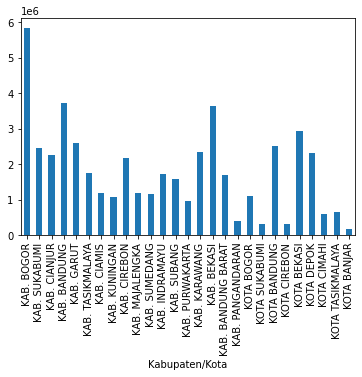

In [25]:
import matplotlib as plt

df_population.set_index('Kabupaten/Kota')['Jumlah'].plot.bar()

Using the graph above, Kab. Bogor (Bogor Regency) has the highest population with 5.840.907 people. Followed by Bandung Regency, Bekasi Regency, and Bekasi City respectively.

To understand and estimate the territories or areas that are within the administrative area of West Java, let's plot all the districts that have been retrieved from https://pikobar.jabarprov.go.id/contact along with their latitude and longitude values. The following lines of Python code will execute the task using Folium API.

In [25]:
# Construct a map of all districts neighborhood in West Java
map_westjava = folium.Map(location=[-6.9, 107.6], zoom_start=9)
for lat, lng, label in zip(df_cases['Latitude'], df_cases['Longitude'], df_cases['CITY/REGENCY']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        location=[lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_westjava)      
map_westjava

The map above shows that all of the Cities/Regencies are within the territorial area of the province. To address the business problem, I need to show the extent and the distribution medical devices for treatment of COVID-19 positive case-patients in West Java based on the number that have been obtained from the government site. The following lines of Python code will achieve the task and present the data in a clear visual approach.

In [26]:
# Plot a map of Covid-19 distribution in West Java per 6 December 2020
map_covid_westjava = folium.Map(location=[-6.9, 107.6], zoom_start=9)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['CITY/REGENCY'],df_cases['ACTIVE CASES']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/6,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_covid_westjava)
map_covid_westjava

From this map, it can be seen that most of the regions in West Java are now in the ‘RED’ zone, with the radius of 6 that most likely represent the relative extent of Covid-19 distribution in West Java. But there are several cities that is not in the red zone, there may be no active cases or no updated data available.

In the government's official website, this data shown in a "slider' format so people can see the daily Covid-19 cases update from March. Therefore, it would be helpful if there is an an app or system that alerts vehicles/road users that they are not allowed to pass the RED zone within the city. 

We also need to see the hospital location to compare the red zone and hospital capacity in the City/Regency, to see how well the accessibility and distribution of the medical resources.

In [27]:
# Construct a map of all existing Covid-19 testing hospitals in West Java
map_hosp = folium.Map(location=[-6.9, 107.6], zoom_start=9)
for lat, lng, hosp in zip(df_hospital['Latitude'], df_hospital['Longitude'], df_hospital['Hospital']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='blue', icon='header'),
        ).add_to(map_hosp)      
map_hosp

The hospitals are quite sparsely distributed within each other especially in densely populated area like Bandung. Let’s see how strategic these hospitals are in accomodating the extent of positive cases patients in the City/Regency. It can be done by overlaying the two data within a single map as shown in the following codes:

In [28]:
# Plot a combined map of Covid-19 distribution in West Java & current available testing centers
map_covid_hosp_westjava = folium.Map(location=[-6.9, 107.6], zoom_start=9)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['CITY/REGENCY'],df_cases['ACTIVE CASES']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/6,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_covid_hosp_westjava)
# Construct a map of all existing Covid-19 testing hospitals in West Java
for lat, lng, hosp in zip(df_hospital['Latitude'], df_hospital['Longitude'], df_hospital['Hospital']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='blue', icon='header'),
        ).add_to(map_covid_hosp_westjava)      
map_covid_hosp_westjava

From the distribution of COVID-19 cases and hospitals location across the province, can be seen that almost all hospitals require a lot of medical resources for COVID-19 treatment. As the number of cases high in Bandung both the city and regency, Cimahi City, and Sumedang Regency, the number of hospitals in these areas are also high.

# Discussion #

In this section, we will analyze locations in the red zone based on the hospital location in the middle of the red zone. Since Depok City has highest number of active cases, we will then determine the surrounding venues and neighborhood of RSUD Kota Depok (Depok Hospital).

Let’s begin by trying to get the top 100 venues that are within Depok Hospital neighborhood and are within a radius of 500 meters of our candidate Covid-19 testing center using FOURSQUARE API. First, let’s create the GET request URL. After that, name that URL, url.

In [29]:
prop_neighborhood = pd.DataFrame({
   'Hospital':['RSUD Kota Depok']
})
neighborhood_latitude_list = []   # create empty lists for latitude
neighborhood_longitude_list = []  # create empty lists for longitude
for index, row in prop_neighborhood.iterrows(): # iterate over rows in dataframe
    neigh = row['Hospital']  
    query = str(neigh) + ', Kota Depok'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    neighborhood_latitude_list.append(lat)
    neighborhood_longitude_list.append(long)
# create new columns from lists    
prop_neighborhood['Latitude'] = neighborhood_latitude_list   
prop_neighborhood['Longitude'] = neighborhood_longitude_list
prop_neighborhood

,Hospital,Latitude,Longitude
0,RSUD Kota Depok,-6.4,106.81861


In [30]:
# Define function that extracts the category of the venue based on the returned JSON file
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
neighborhood_latitude = 0
neighborhood_longitude = 0
address = 'Kota Depok'
geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
neighborhood_latitude= location.latitude
neighborhood_longitude= location.longitude
print("RSUD Kota Depok: ", neighborhood_latitude, ",",neighborhood_longitude)

RSUD Kota Depok:  -6.39393925 , 106.822624794566


After that, get URL for the API in Depok Hospital neighborhood.

In [31]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius in meter
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=K3C2ZJ3MRUF2MATZHEPADNELXTNLARSCRRKGKGHIUQN2KU3T&client_secret=K4AELPMAMXQO2IFJAS4IZVWABCEPDGP1S11OV4VDQCUXOYCA&v=20180604&ll=-6.39393925,106.822624794566&radius=500&limit=100'

Make a request using REQUEST library, and name the query results for Depok Hospital area, results.

In [32]:
# Send the GET request and examine the resutls
results = requests.get(url).json()
# results - not printed for shortening of the report

Next, we will use the above function (get_category_type) to extract information from the JSON file related to venues in the Depok Hospital neighborhood. Using the following code.

In [33]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Sop Durian Margonda,Snack Place,-6.390426,106.825303
1,Sop Durian Margando,Lounge,-6.390322,106.825298
2,D'Cost Seafood,Seafood Restaurant,-6.392386,106.823496
3,Warung Tekko,Indonesian Restaurant,-6.393244,106.824413
4,KFC,Fast Food Restaurant,-6.392458,106.823809
5,Carrefour,Supermarket,-6.392719,106.823285
6,Depok XXI,Multiplex,-6.392401,106.826079
7,Haircode Salon,Spa,-6.392370,106.824081
8,Stasiun Depok Baru,Train Station,-6.391200,106.821960
9,Starbuck Depok Square,Coffee Shop,-6.391293,106.821597


In [34]:
# Check how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare for {} neighborhood.'.format(nearby_venues.shape[0], prop_neighborhood.iloc[0,0]))

13 venues were returned by Foursquare for RSUD Kota Depok neighborhood.


Using the results generated by the FOURSQUARE API, the business site around Depok Hospital are identified, see which businesses are on the red zone.

In [35]:
# Sort venues around Depok Hospital area
df_depok_neigh = nearby_venues.groupby('categories').count()
df_depok_neigh.drop(columns =['lat', 'lng'], inplace=True)
df_depok_neigh.sort_values(by='name', ascending=False, inplace=True)
df_depok_neigh1 = df_depok_neigh.iloc[0:14]
df_depok_neigh2 = df_depok_neigh.iloc[14:]
df_depok_neigh1.reset_index()

,categories,name
0,Fast Food Restaurant,2
1,Coffee Shop,1
2,Department Store,1
3,Grocery Store,1
4,Indonesian Restaurant,1
5,Lounge,1
6,Multiplex,1
7,Seafood Restaurant,1
8,Snack Place,1
9,Spa,1


The next set of challenges that we need to tackle is to gain slightly more insights (profile) of the Depok Hospital area. To simplify the analysis, we can use the Euclidian (distance-based) clustering technique which is part of the unsupervised machine learning technique. In particular, we will use K-means clustering.

First, we need to decide the best K-value for our analysis. By utilizing the K-means clustering algorithm to calculate this using the following lines of code.

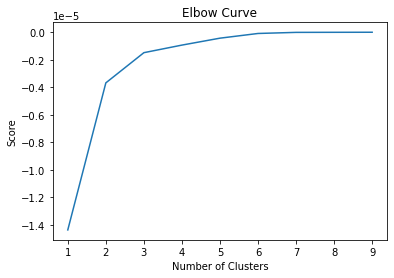

In [36]:
import matplotlib.pyplot as plt
# Apply unsupervised Machine Learning clustering technique to the neighborhood data in Tarakan Hospital
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = nearby_venues[['lat']]
X_axis = nearby_venues[['lng']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

The X-axis shows various number of K-values that we can use for our clustering analysis. From this elbow curve, it can be seen that the curve starts flattening out at K=3, then more flattened at K=6. Therefore, we will use a K=3 to cluster neighborhoods surrounding our proposed Covid-19 testing center. The following lines of code assign Cluster label to all venues that are within a 500-meter radius of our Covid-19 testing center in Depok Hospital area:

In [37]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(nearby_venues[nearby_venues.columns[2:4]]) # Compute k-means clustering.
nearby_venues['cluster_label'] = kmeans.fit_predict(nearby_venues[nearby_venues.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(nearby_venues[nearby_venues.columns[2:4]]) # Labels of each point
nearby_venues

,name,categories,lat,lng,cluster_label
0,Sop Durian Margonda,Snack Place,-6.390426,106.825303,1
1,Sop Durian Margando,Lounge,-6.390322,106.825298,1
2,D'Cost Seafood,Seafood Restaurant,-6.392386,106.823496,2
3,Warung Tekko,Indonesian Restaurant,-6.393244,106.824413,2
4,KFC,Fast Food Restaurant,-6.392458,106.823809,2
5,Carrefour,Supermarket,-6.392719,106.823285,2
6,Depok XXI,Multiplex,-6.392401,106.826079,1
7,Haircode Salon,Spa,-6.392370,106.824081,2
8,Stasiun Depok Baru,Train Station,-6.391200,106.821960,0
9,Starbuck Depok Square,Coffee Shop,-6.391293,106.821597,0


In [38]:
# Check whether all the cluster labels exist in the data
list(nearby_venues['cluster_label'].unique())
[0, 2, 1]

[0, 2, 1]

To visualize the clustering of the neighborhood, we need to create a custom functions called "regioncolors" that would help us differentiate the facilities using color.

In [39]:
def regioncolors(counter):
    if counter['cluster_label'] == 0:
        return 'green'
    elif counter['cluster_label'] == 1:
        return 'blue'
    elif counter['cluster_label'] == 2:
        return 'red'
    else:
        return 'error'
nearby_venues["color"] = nearby_venues.apply(regioncolors, axis=1)
nearby_venues

,name,categories,lat,lng,cluster_label,color
0,Sop Durian Margonda,Snack Place,-6.390426,106.825303,1,blue
1,Sop Durian Margando,Lounge,-6.390322,106.825298,1,blue
2,D'Cost Seafood,Seafood Restaurant,-6.392386,106.823496,2,red
3,Warung Tekko,Indonesian Restaurant,-6.393244,106.824413,2,red
4,KFC,Fast Food Restaurant,-6.392458,106.823809,2,red
5,Carrefour,Supermarket,-6.392719,106.823285,2,red
6,Depok XXI,Multiplex,-6.392401,106.826079,1,blue
7,Haircode Salon,Spa,-6.392370,106.824081,2,red
8,Stasiun Depok Baru,Train Station,-6.391200,106.821960,0,green
9,Starbuck Depok Square,Coffee Shop,-6.391293,106.821597,0,green


We have assigned cluster labels to all of the neighborhood venues, as well as unique colors to each cluster. Next, we can then visualize the clustering analysis to a Folium map and see how all of these venues are geographically distributed within the 500-meter radius of the surrounding facilities.

In [40]:
# Construct a map of neighborhood venues in Tarakan Hospital, Cetral Jakarta 
map_Depok = folium.Map(location=[-6.4, 106.81861], zoom_start=16)
for lat, lng, cat, col in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['categories'], nearby_venues['color']):
    label = folium.Popup(cat, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=cat,
        icon=folium.Icon(color=col),
        ).add_to(map_Depok)      
for lat, lng, neigh in zip(prop_neighborhood['Latitude'], prop_neighborhood['Longitude'], prop_neighborhood['Hospital']):
    label = folium.Popup(neigh, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=neigh,
        icon=folium.Icon(color='darkblue', icon='header'),
        ).add_to(map_Depok)
    
map_Depok

Finally, compiled a map of these business location with a map of the distribution of COVID-19 cases in Depok City.

In [41]:
# Construct a map of neighborhood venues in Depok Hospital, Depok City
map_Redzone = folium.Map(location=[-6.4, 106.81861], zoom_start=15)
for lat, lng, cat, col in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['categories'], nearby_venues['color']):
    label = folium.Popup(cat, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=cat,
        icon=folium.Icon(color=col),
        ).add_to(map_Redzone)      
for lat, lng, neigh in zip(prop_neighborhood['Latitude'], prop_neighborhood['Longitude'], prop_neighborhood['Hospital']):
    label = folium.Popup(neigh, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=neigh,
        icon=folium.Icon(color='darkblue', icon='header'),
        ).add_to(map_Redzone)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['CITY/REGENCY'],df_cases['ACTIVE CASES']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/6,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_Redzone)
    
map_Redzone

The result of analysis is the location of the business which is in the Depok Hospital neighborhood and is within a radius of 500 meters. Then, we also get the most congested cluster if businesses apply normal conditions in the red zone, potentially increasing cases of contracting the COVID-19 virus within the area.

# Results and Discussion #

The capstone project aims to provide information to local people who must be alerted to go out of the house from the distribution of the COVID-19 case in Jakarta. It also aims to provide information on areas that are most needed for plenty of mask distribution, according to population density in the area.

Furthermore, it provides information on which cities that need the most medical resources for COVID-19 treatment, including medical equipment and personnels. The analysis also provides information on the business neighborhood which shall implement Covid-19 health protocol with a high discipline in new normal situation.

# Conclusion #

The purpose of this capstone project was to identify which areas has the most cases and see the distribution of hospitals and medical resources across the province. This would help mask distributors to understand potential distribution areas according to population density in West Java's City/Regency. Furthermore, it will also help the distribution of medical devices for Covid-19 test devices to hospitals that are estimated to have a large number of patients or even helps analyzing which hospitals need additional medical equipments and personnel.

The analysis will surely provide awareness for business owners who run the business in the red zone areas to adjust their service by enhancing health protocol for its customers. Therefore, hopefully the number of active cases in particular area can be decreased.